# What is Bigbasket
BigBasket is an Indian online grocer headquartered in Bangalore, India, and currently owned by Tata Digital.[1] It was the first online grocer in India, set up in 2011. It is a registered company with the name Supermarket Grocery Supplies Pvt. Ltd.



In [1]:
# Importing major libraries 

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 


In [2]:
# Loading dataset in df


df=pd.read_csv('BigBasket.csv')

In [3]:
df

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


#####  About our dataset 

Our dataset contains information regarding items listed on BigBasket 

#### columns breifs

- **index** : Unique Identifier for each product 
- **product** : Name of the product listed
- **category** : Category of the product listed
- **sub_category** : Category is further broken down into subcategories
- **brand**  : Name of the company of the product listed 
- **sale_price** : Price at which item is being sold
- **market_price** : It holds the value of maximum retail price MRP of the product 
- **type** : Type of product
- **rating** : Aggregate rating given to the product
- **description** : Description of the product

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18919 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [5]:
# Seeking description of the dataset 

df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27549.000000,27555.000000,18919.000000
mean,13778.00000,334.648391,382.056664,3.943295
std,7954.58767,1202.102113,581.730717,0.739217
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.320000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,112475.000000,12500.000000,5.000000


- It shows us all the numerical columns and their statistical summary.
- By seeing count column we can see there are some null values in sale_price and ratings.
- By seeing the mean of sale_price and market_price we can see a very common relation, that srp can never be more than mrp.
- Info- that there is huge difference b/w market price and sale_price , sale_price is about 2 times mrp std ,
    + which means that huge discounts are give or their could be outliers.
- Min values are considerable except 1 in market price, we will come back to that later
- Max values are considerble

### Manual assessing 

#####  Dealing with null values

In [6]:
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         6
market_price       0
type               0
rating          8636
description      115
dtype: int64

- Product has 1 null values
- Brand has 1 null value
- Sale_price has 6 null values
- Ratings has 8636 null values
- Description has 115 null values

In [7]:
df.isnull().sum().sum()

8759

Total null values are 8759

In [8]:
df.sale_price

0        220.00
1        180.00
2        119.00
3        149.00
4        162.00
          ...  
27550    199.20
27551     67.50
27552    200.00
27553    396.00
27554    214.53
Name: sale_price, Length: 27555, dtype: float64

In [9]:
df[df.sale_price.isnull()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
1719,1720,Puja Flower Wicks - Puvvu Vathulu Batti,Cleaning & Household,Pooja Needs,Jaji,NaN,20.0,Camphor & Wicks,NaN,Jaji Puja Flower Batti / Puvvu Vathulu is made...
1720,1721,Powder - Sambar,"Foodgrains, Oil & Masala",Masalas & Spices,Annapoorna,NaN,46.0,Blended Masalas,NaN,Annaporna Spices are the preserve for Connoiss...
1721,1722,"Steel Fork - Medium, Premium Excel Series, BBCL08","Kitchen, Garden & Pets",Crockery & Cutlery,BB Home,NaN,299.0,"Cutlery, Spoon & Fork",NaN,BB Home provides fine and classy cutlery that ...
1722,1723,Snack Mix - Dhokla,Snacks & Branded Foods,Ready To Cook & Eat,MTR,NaN,65.0,Breakfast & Snack Mixes,4.1,MTR Dhokla is extremely special in Gujarat. It...
2401,2402,Battery AA 3UT Hi Top,"Kitchen, Garden & Pets",Appliances & Electricals,Nippo,NaN,150.0,Battery & Electrical,4.0,This Nippo battery incorporates state-of-the-a...
2402,2403,Klassic Plain Cocktail Napkins (22 X 22 cm),Cleaning & Household,"Disposables, Garbage Bag",Origami,NaN,32.0,Toilet Paper,3.9,Klassic Plain Cocktail Napkins (22 X 22 cm) 10...


In [10]:
# to fill null values of sale_price column

df.sale_price.fillna(df.market_price , inplace=True)

In [11]:
# Test
df.sale_price.isnull().sum()

0

- our column, sale_price is free of null values

In [12]:
# Dealimg with null values in product 

df[df['product'].isnull()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
14363,14364,NaN,Beverages,Coffee,Cothas Coffee,200.0,240.0,Ground Coffee,4.2,Cothas Specialty Blend Coffee and Chicory incl...


In [13]:
#code
df['product'].fillna('coffee' , inplace=True)

In [14]:
#test
df[df['product'].isnull()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description


In [15]:
# Dealimg with null values in brand column 
df[df.brand.isnull()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
9765,9766,Food Package - Medium,Cleaning & Household,"Disposables, Garbage Bag",NaN,50.0,50.0,"Aluminium Foil, Clingwrap",NaN,NaN


In [16]:
#code
df.brand.fillna('unknown' , inplace=True )

In [17]:
#test
df[df.brand.isnull()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description


In [18]:
df.isnull().sum()

index              0
product            0
category           0
sub_category       0
brand              0
sale_price         0
market_price       0
type               0
rating          8636
description      115
dtype: int64

In [19]:
df[df.rating.isnull()]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
55,56,Soothing Cucumber Facial Scrub With Apricot Seeds,Beauty & Hygiene,Skin Care,TJORI,299.4,499.0,Face Care,NaN,The soothing feel of cucumber meets the gentle...
59,60,Corporate Planner Diary With Premium PU Leathe...,Cleaning & Household,Stationery,Prozo Plus,399.0,399.0,"Notebooks, Files, Folders",NaN,A5 Size (210x150mm) \n192 Pages Premium Natura...
65,66,Ayurvedic Anti-Tan Face Pack,Beauty & Hygiene,Skin Care,TJORI,269.4,449.0,Face Care,NaN,A nourishing face pack that removes tan and br...
68,69,Organic Carom Seeds/Ajwain/Om Kalu,"Foodgrains, Oil & Masala",Masalas & Spices,Earthon,72.0,72.0,Whole Spices,NaN,"Earthon's Ajwain is Best quality, organically ..."
69,70,"Padded Harness - 3/4 inch, Grey Colour","Kitchen, Garden & Pets",Pet Food & Accessories,Glenand,840.0,840.0,Pet Collars & Leashes,NaN,These are soft padded harness for your active ...
...,...,...,...,...,...,...,...,...,...,...
27509,27510,Deluxe Crackers - Veg,Gourmet & World Food,Chocolates & Biscuits,Kerk,150.0,150.0,"Cookies, Biscotti, Wafer",NaN,Kerk Biscuits-has been a household name synony...
27511,27512,Specialist Stain Remover Pen & Marker,Cleaning & Household,All Purpose Cleaners,365,449.0,449.0,Imported Cleaners,NaN,Mightier than the pen. The pen may be mightier...
27514,27515,Verge & Sheer Perfume For Pair,Beauty & Hygiene,Fragrances & Deos,Skinn by Titan,1615.5,1795.0,Perfume,NaN,VERGE for men paints a picture of a classy out...
27530,27531,Tick'et to Fleadom Dry Shampoo For Dogs,"Kitchen, Garden & Pets",Pet Food & Accessories,Captain Zack,99.0,99.0,Pet Cleaning & Grooming,NaN,1) No Rinse Defence Against Ticks and Fleas: C...


In [20]:
df.rating.value_counts()

rating
4.2    2249
4.3    2138
4.0    2089
4.1    1767
5.0    1407
4.4    1037
3.9     932
3.8     866
4.5     797
3.0     684
3.7     672
3.5     535
3.6     447
3.3     400
1.0     387
4.6     322
3.4     303
4.7     287
2.0     237
4.8     199
3.2     181
3.1     163
2.5     132
2.8     125
2.7     116
2.3      94
2.9      79
2.6      58
4.9      53
1.5      32
2.4      29
2.2      24
1.8      22
1.7      22
2.1      10
1.3       9
1.4       6
1.9       4
1.6       3
1.2       2
Name: count, dtype: int64

In [21]:
# code

df.rating.fillna(0 , inplace=True)


In [22]:
#test
df.rating.isnull().sum()

0

In [23]:
# Filling null values in description column 
#code
df.description.fillna('No Description' , inplace=True)

In [24]:
#test 
df.isnull().sum()

index           0
product         0
category        0
sub_category    0
brand           0
sale_price      0
market_price    0
type            0
rating          0
description     0
dtype: int64

- Now our data is free of null values

In [25]:
# checking for any duplicated values in our dataset

df.duplicated().sum()

0

- there are no duplicate values in this data

In [26]:
# Checking the accuracy of our dataset

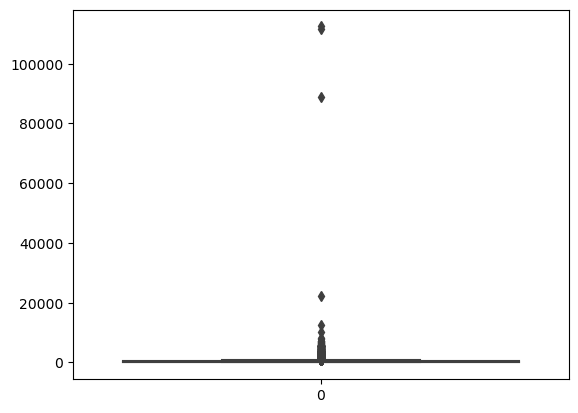

In [27]:
# Finding outliers using boxplot 

sns.boxplot(df.sale_price)
plt.show()

- Not a good visualisation
- We can see Most of the outliers are above 20,000

In [28]:
df[df.sale_price> df.market_price]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
248,249,4mm Aluminium Induction Base Chapati Roti Tawa...,"Kitchen, Garden & Pets",Cookware & Non Stick,HAZEL,111649.0,1289.0,Tawa & Sauce Pan,0.0,Hazel Aluminium Tawa has an ergonomic design f...
288,289,Arrabbiata Tomato Pasta Sauce With Chilli,Gourmet & World Food,"Sauces, Spreads & Dips",Montanini,22325.0,325.0,Mustard & Cheese Sauces,5.0,No Description
412,413,Original Care Lip Balm For 24h Moisture With S...,Beauty & Hygiene,Skin Care,Nivea,1114.8,140.0,Lip Care,4.3,Nivea Original Care Lip Blam nourishes lips in...
436,437,"Balloon - Polka Dot, 12 Inch",Cleaning & Household,Party & Festive Needs,B Vishal,88899.0,129.0,"Caps, Balloons & Candles",3.9,"Whether it is a party in the office, a Christm..."
1249,1250,Beard Kit,Beauty & Hygiene,Men's Grooming,Uncle Tony,112475.0,3300.0,Combos & Gift Sets,0.0,"The combination of a beard oil, a beard wash, ..."


- these are wrong entries clearly as sale price is more than market price and thats not possible

<Axes: xlabel='market_price', ylabel='sale_price'>

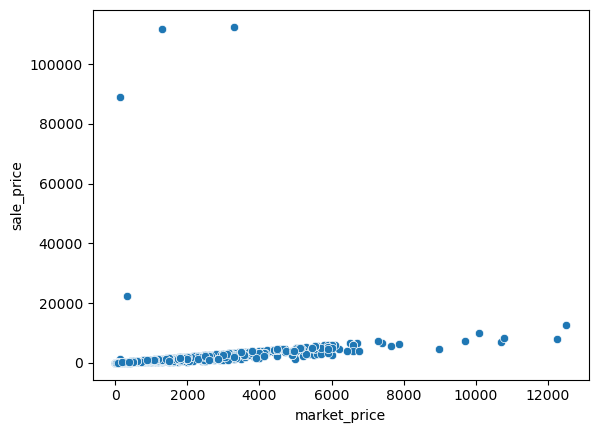

In [29]:
# Scatterplot
sns.scatterplot(data=df , y='sale_price' , x='market_price' )

In [30]:
df[df.sale_price> df.market_price]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
248,249,4mm Aluminium Induction Base Chapati Roti Tawa...,"Kitchen, Garden & Pets",Cookware & Non Stick,HAZEL,111649.0,1289.0,Tawa & Sauce Pan,0.0,Hazel Aluminium Tawa has an ergonomic design f...
288,289,Arrabbiata Tomato Pasta Sauce With Chilli,Gourmet & World Food,"Sauces, Spreads & Dips",Montanini,22325.0,325.0,Mustard & Cheese Sauces,5.0,No Description
412,413,Original Care Lip Balm For 24h Moisture With S...,Beauty & Hygiene,Skin Care,Nivea,1114.8,140.0,Lip Care,4.3,Nivea Original Care Lip Blam nourishes lips in...
436,437,"Balloon - Polka Dot, 12 Inch",Cleaning & Household,Party & Festive Needs,B Vishal,88899.0,129.0,"Caps, Balloons & Candles",3.9,"Whether it is a party in the office, a Christm..."
1249,1250,Beard Kit,Beauty & Hygiene,Men's Grooming,Uncle Tony,112475.0,3300.0,Combos & Gift Sets,0.0,"The combination of a beard oil, a beard wash, ..."


- We will replace the wrong values with market price

In [31]:
# Code - to replace wrong values
df.sale_price=np.where(df.sale_price>df.market_price , df.market_price , df.sale_price )

In [32]:
df[df.sale_price>df.market_price]

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description


- Now the values are replaced, no more wrong entries

<Axes: xlabel='market_price', ylabel='sale_price'>

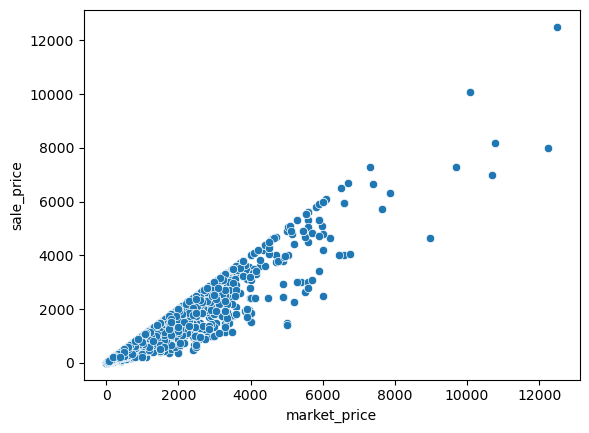

In [33]:
sns.scatterplot(data=df, x='market_price' , y= 'sale_price')


In [34]:
# Deleting unnecessary

df=df.drop(['index'],axis=1)

In [35]:
# Saving a copy of dataset 

df.to_csv('Bigbasket_clean.csv' , index=False)

In [36]:
# Loading clean dataset in df


df = pd.read_csv('Bigbasket_clean.csv')

In [37]:
df

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...
27550,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [38]:
df.columns

Index(['product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

In [39]:
df.category

0              Beauty & Hygiene
1        Kitchen, Garden & Pets
2          Cleaning & Household
3          Cleaning & Household
4              Beauty & Hygiene
                  ...          
27550          Beauty & Hygiene
27551      Gourmet & World Food
27552      Gourmet & World Food
27553                 Beverages
27554          Beauty & Hygiene
Name: category, Length: 27555, dtype: object

In [40]:
df.category.value_counts()

category
Beauty & Hygiene            7867
Gourmet & World Food        4690
Kitchen, Garden & Pets      3580
Snacks & Branded Foods      2814
Foodgrains, Oil & Masala    2676
Cleaning & Household        2675
Beverages                    885
Bakery, Cakes & Dairy        851
Baby Care                    610
Fruits & Vegetables          557
Eggs, Meat & Fish            350
Name: count, dtype: int64

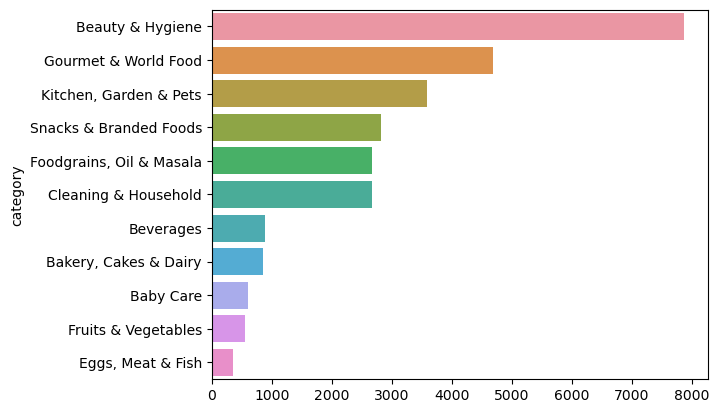

In [41]:
sns.barplot(y=df.category.value_counts().index , x=df.category.value_counts().values)
plt.show()

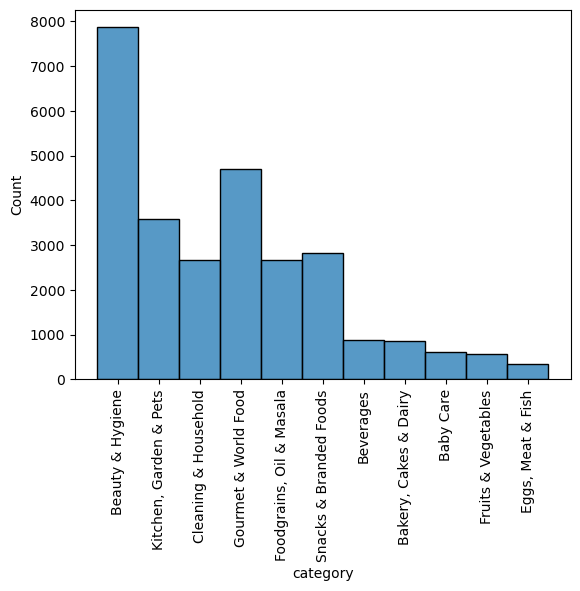

In [42]:
sns.histplot(df.category)
plt.xticks(rotation=90)
plt.show()

###### Insights



In [43]:
tempdf=df[df.category=='Beauty & Hygiene']

In [44]:
tempdf

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
6,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.00,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.00,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.00,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
...,...,...,...,...,...,...,...,...,...
27541,Herbal Rose & Apricot Walnut Facial Scrub,Beauty & Hygiene,Skin Care,Khadi Natural,250.00,250.0,Face Care,4.4,Rose and apricot walnut face scrub helps in re...
27542,Embellish Skin Lightening Serum,Beauty & Hygiene,Skin Care,Organic Harvest,1525.75,1795.0,Face Care,4.2,Achieve an everlasting illuminated skin by inc...
27548,Apple Cider Vinegar Shampoo,Beauty & Hygiene,Hair Care,Morpheme Remedies,499.00,499.0,Shampoo & Conditioner,5.0,"Say no to dull, lifeless, dry and damaged hair..."
27550,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...


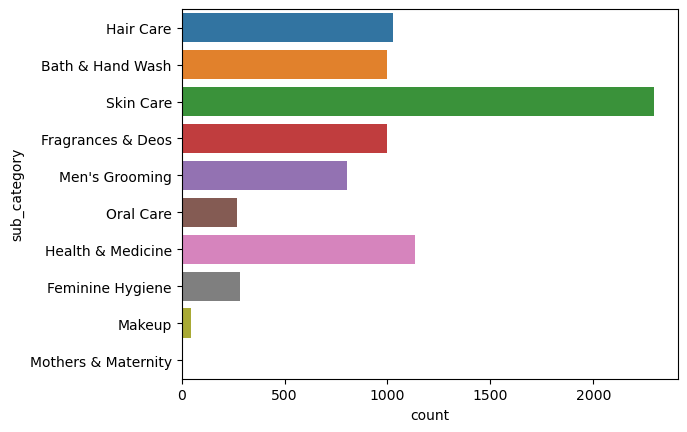

In [45]:
sns.countplot(y=tempdf.sub_category)
plt.show()

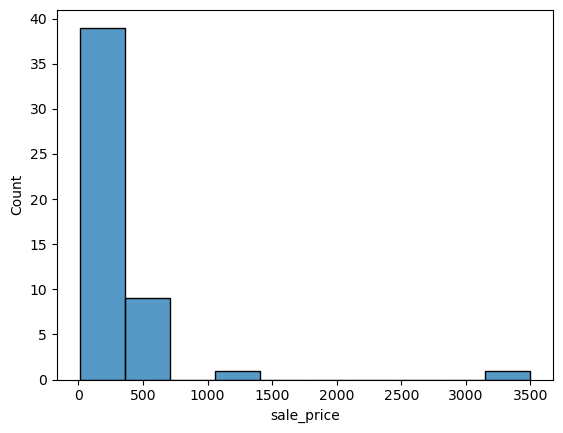

In [57]:
sns.histplot(df.sale_price.sample(50), bins=10)
plt.show()

In [46]:
tempdf.sub_category.value_counts()

sub_category
Skin Care              2294
Health & Medicine      1133
Hair Care              1028
Fragrances & Deos      1000
Bath & Hand Wash        996
Men's Grooming          805
Feminine Hygiene        285
Oral Care               271
Makeup                   48
Mothers & Maternity       7
Name: count, dtype: int64

In [47]:
tempdf=df[df.category=='Eggs, Meat & Fish']
tempdf

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
240,Fresh Catch Fish Fingers,"Eggs, Meat & Fish",Fish & Seafood,Ifb,240.00,240.0,Frozen Fish & Seafood,0.0,You can’t beat the classics. Perfectly crispy ...
260,Chicken Cocktail Sausage,"Eggs, Meat & Fish","Sausages, Bacon & Salami",Fresho,171.60,220.0,Chicken Sausages,0.0,Chicken Cocktail Sausage is made with premium ...
293,Pork Classic Salami,"Eggs, Meat & Fish","Sausages, Bacon & Salami",La Carne,191.25,225.0,Pork & Ham,0.0,"At La Carne, we take pride in offering product..."
313,"Pork - Fresh Bacon, Sliced","Eggs, Meat & Fish","Sausages, Bacon & Salami",Fresho Signature,360.00,400.0,Pork & Ham,0.0,Casanova Bacon Sliced (Fresh) is a premium-qua...
317,Chicken Jalapeno Cheese Nuggets,"Eggs, Meat & Fish","Sausages, Bacon & Salami",Meatzza,285.00,300.0,Chicken Sausages,0.0,"Boneless chicken meat, formed, batter-coated &..."
...,...,...,...,...,...,...,...,...,...
27190,Fish - Nuggets,"Eggs, Meat & Fish",Fish & Seafood,Seastar,168.00,210.0,Frozen Fish & Seafood,0.0,"Sea star frozen BASA FISH fillets, packed by u..."
27293,Italian - Sausages Chicken,"Eggs, Meat & Fish","Sausages, Bacon & Salami",Yummiez,150.00,160.0,Chicken Sausages,0.0,Now you can relish an Italian Breakfast everyd...
27356,Prawns Balchao Masala,"Eggs, Meat & Fish",Fish & Seafood,Gadre,254.15,299.0,Frozen Fish & Seafood,0.0,Prawns Balchao Masala is made with combining P...
27466,Chicken Seekh Kabab Punjabi,"Eggs, Meat & Fish","Sausages, Bacon & Salami",Fresho,223.00,290.0,Chicken Sausages,0.0,"Prepared in the traditional style, the kebabs ..."


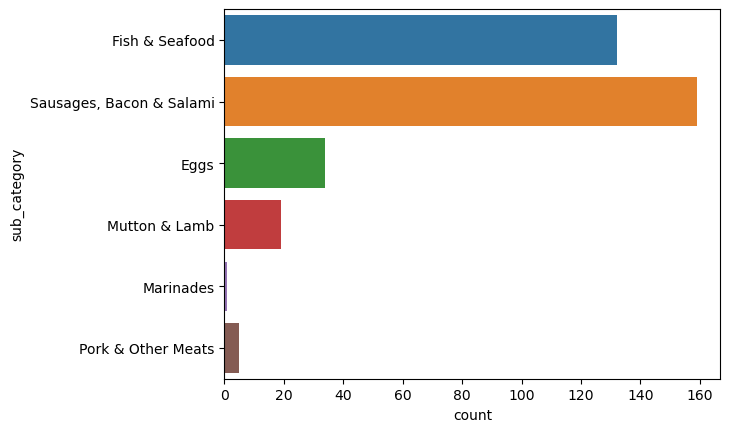

In [48]:
sns.countplot(y=tempdf.sub_category)
plt.show()

In [49]:
tempdf=df[df.category=='Fruits & Vegetables']
f=tempdf.sub_category.value_counts().head(6)
f.index


Index(['Fresh Vegetables', 'Fresh Fruits', 'Cuts & Sprouts',
       'Exotic Fruits & Veggies', 'Organic Fruits & Vegetables',
       'Herbs & Seasonings'],
      dtype='object', name='sub_category')

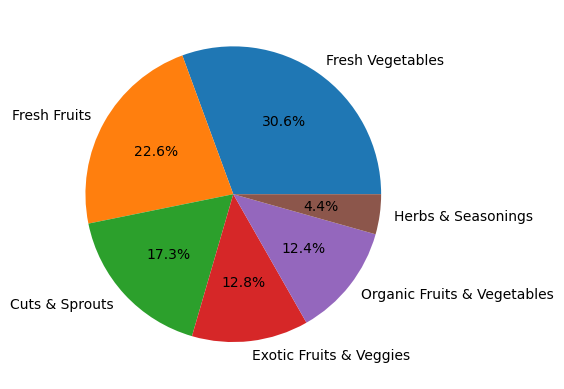

In [50]:
plt.pie(f,labels=f.index , autopct='%1.1f%%')  
plt.show()

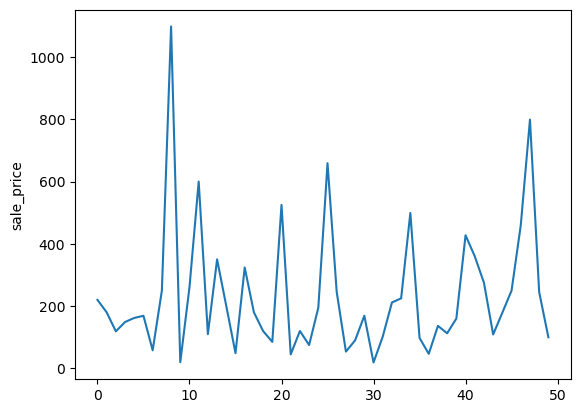

In [51]:
sns.lineplot(df.sale_price.head(50))
plt.show()

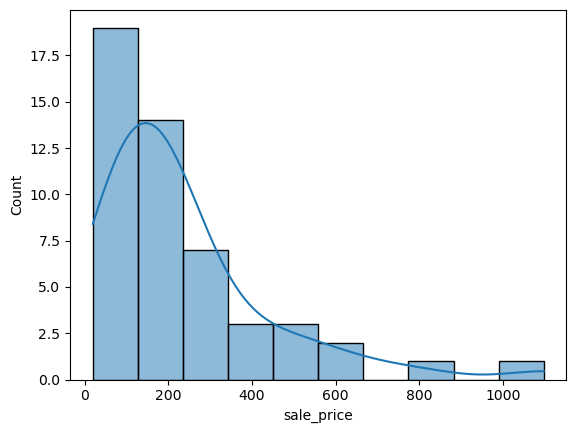

In [52]:
sns.histplot(df.sale_price.head(50), bins=10 , kde=True)
plt.show()

###### Here we can see that our data is positively skewed

In [53]:
df.brand.value_counts().head(10)

brand
Fresho              638
bb Royal            539
BB Home             428
DP                  250
Fresho Signature    171
bb Combo            168
Amul                153
INATUR              146
Himalaya            141
Dabur               138
Name: count, dtype: int64

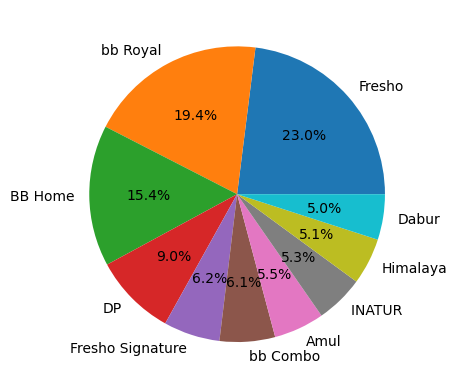

In [54]:
plt.pie(df.brand.value_counts().head(10) , autopct='%1.1f%%' ,labels=df.brand.value_counts().head(10).index)
plt.show()

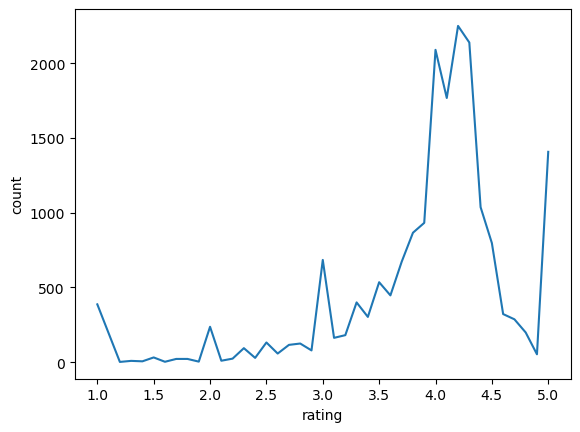

In [55]:
f=df[df.rating>=1].rating.value_counts()
sns.lineplot(f)
plt.show()

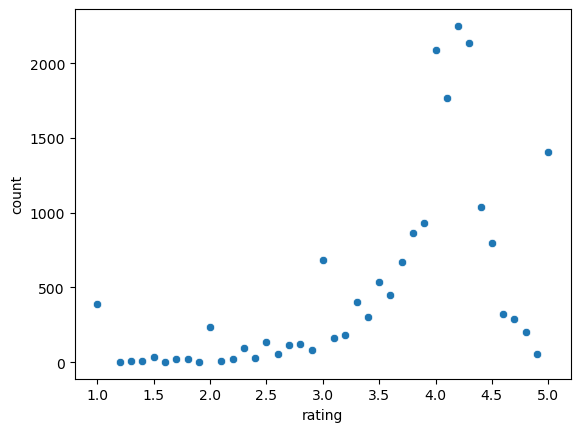

In [56]:
sns.scatterplot(f)
plt.show()

### Conclusions 

- From our visualisation we can also see that our dataset is positively skewed
- Most of the products available on bigbasket are from their home brand bb royal, bb fresh , bb homes etc but they need to increase their inventory and increase other brands that are in demand by customers. 
- Bigbasket has more stock available for Beauty & Hygiene reason maybe as they have more shelf life they can be stored for long time without any damage.
- In Beauty & Hygiene further quantity of skincare is highest which shows that recently people are getting cautious for their skin are Investing in skincare products.
- From out rating Visualisation we can see that most of the products are rated between 3.5-4.5
 
